/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0203
Epoch 2/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0014
Epoch 3/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0014
Epoch 4/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0015
Epoch 5/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0014
Epoch 6/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0014
Epoch 7/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0014
Epoch 8/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 0.0014
Epoch 9/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 0.0014
Epoch 10/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0013
Epoch 11/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.0013
Epoch 12/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.0014
Epoch 13/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0013
Epoch 14/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0014
Epoch 15/30
337/337 ━━━━━━━━━━━━━━━━━━━━

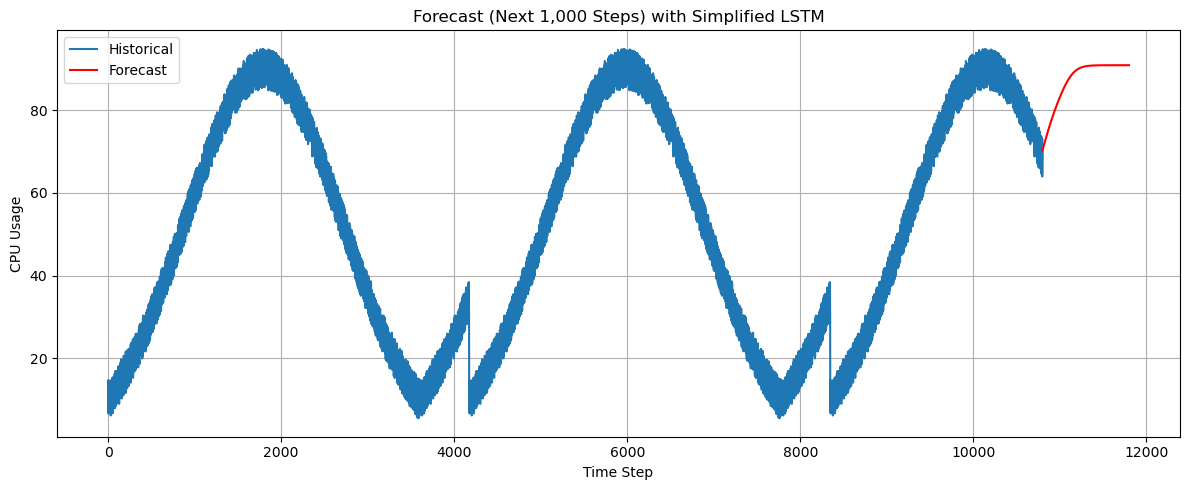

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load and scale data
df = pd.read_csv("/Users/biraveennedunchelian/Documents/Masteroppgave/Masteroppgave/Newest addition/Gausian curve/gaussian_curve_fixedidk.csv")
data = df['Y'].values.reshape(-1, 1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sliding window
window_size = 30
X, y = [], []
for i in range(len(scaled_data) - window_size):
    X.append(scaled_data[i:i + window_size])
    y.append(scaled_data[i + window_size])
X, y = np.array(X), np.array(y)

# Build model
from keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(window_size, 1)),
    Dropout(0.2),
    LSTM(64),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=30, batch_size=32, verbose=1)

# Forecast future steps
forecast_steps = 1000
input_seq = scaled_data[-window_size:]
forecast = []

for _ in range(forecast_steps):
    pred = model.predict(input_seq.reshape(1, window_size, 1), verbose=0)[0, 0]
    forecast.append(pred)
    input_seq = np.append(input_seq[1:], [[pred]], axis=0)

# Rescale forecast
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()

# Plot
plt.figure(figsize=(12, 5))
plt.plot(data, label="Historical")
plt.plot(range(len(data), len(data) + forecast_steps), forecast, label="Forecast", color='red')
plt.xlabel("Time Step")
plt.ylabel("CPU Usage")
plt.title("Forecast (Next 1,000 Steps) with Simplified LSTM")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


337/337 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0298
Epoch 2/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0015
Epoch 3/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0015
Epoch 4/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0014
Epoch 5/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0014
Epoch 6/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0013
Epoch 7/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0014
Epoch 8/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0014
Epoch 9/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0013
Epoch 10/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 0.0013
Epoch 11/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.0013
Epoch 12/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 0.0013
Epoch 13/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 0.0013
Epoch 14/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - loss: 0.0013
Epoch 15/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step

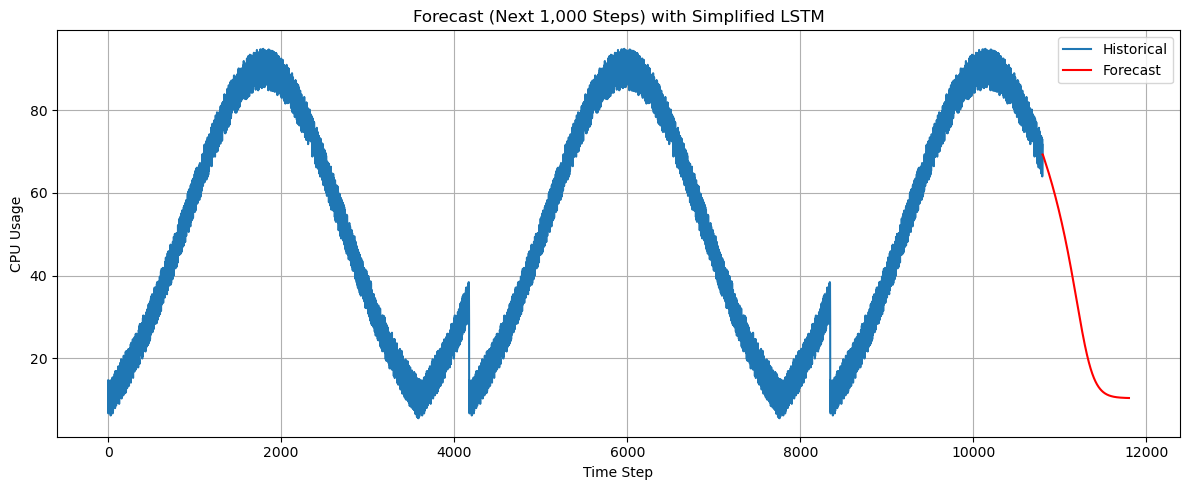

In [10]:
#Samme bare med 540 steps
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load and scale data
df = pd.read_csv("/Users/biraveennedunchelian/Documents/Masteroppgave/Masteroppgave/Newest addition/Gausian curve/gaussian_curve_fixedidk.csv")
data = df['Y'].values.reshape(-1, 1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sliding window
window_size = 30
X, y = [], []
for i in range(len(scaled_data) - window_size):
    X.append(scaled_data[i:i + window_size])
    y.append(scaled_data[i + window_size])
X, y = np.array(X), np.array(y)

# Build model
from keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(window_size, 1)),
    Dropout(0.2),
    LSTM(64),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=30, batch_size=32, verbose=1)

# Forecast future steps
forecast_steps = 1000
input_seq = scaled_data[-window_size:]
forecast = []

for _ in range(forecast_steps):
    pred = model.predict(input_seq.reshape(1, window_size, 1), verbose=0)[0, 0]
    forecast.append(pred)
    input_seq = np.append(input_seq[1:], [[pred]], axis=0)

# Rescale forecast
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()

# Plot
plt.figure(figsize=(12, 5))
plt.plot(data, label="Historical")
plt.plot(range(len(data), len(data) + forecast_steps), forecast, label="Forecast", color='red')
plt.xlabel("Time Step")
plt.ylabel("CPU Usage")
plt.title("Forecast (Next 1,000 Steps) with Simplified LSTM")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()